<a href="https://colab.research.google.com/github/JavierPachas/tf_examples/blob/main/tf_02_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detecting features in images**

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense

In [4]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

training_images = training_images.reshape(60000, 28,28,1)
training_images = training_images/ 255.0
test_images = test_images.reshape(10000, 28,28,1)
test_images = test_images/ 255.0

model = tf.keras.models.Sequential([
    #convolutional layer used as input layer. We want the layer to learn 64 convolutions of 3x3 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',
                       input_shape = (28, 28, 1)),
    #Pooling layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 50)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/50
1875/1875 [==============================] - 97s 51ms/step - loss: 0.4361 - accuracy: 0.8411
Epoch 2/50
1875/1875 [==============================] - 91s 48ms/step - loss: 0.2908 - accuracy: 0.8936
Epoch 3/50
1875/1875 [==============================] - 91s 48ms/step - loss: 0.2432 - accuracy: 0.9095
Epoch 4/50
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2119 - accuracy: 0.9202
Epoch 5/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1842 - accuracy: 0.9308
Epoch 6/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1631 - accuracy: 0.9384
Epoch 7/50
1875/1875 [==============================] - 89s 48ms/step - loss: 0.1419 - accuracy: 0.9464
Epoch 8/50
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1242 - accuracy: 0.9528
Epoch 9/50
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1083 - accuracy: 0.9599
E

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

##**CNN to distinguish between images of horses and humans**

Over a thousand computer-generated 300 x 300 images of horses and humans.

In [20]:
import urllib.request
import zipfile

url = 'https://storage.googleapis.com/learning-datasets/horse-or-human.zip'

file_name = 'horse-or-human.zip'
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#We used ImageDataGenerator to rescale the previous images, let's add some other transformations
#Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40, #rotating each image randomly up to 40 degrees left or right
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)


Found 1027 images belonging to 2 classes.


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu',
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 35, 35, 64)       

In [24]:
#!pip install pillow
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer =  RMSprop(lr = 0.001),
              metrics = ['accuracy'])
history = model.fit_generator(
    train_generator,
    epochs = 15
)

<ipython-input-24-278e96118fdc>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
33/33 [==============================] - 121s 4s/step - loss: 0.7435 - accuracy: 0.5190
Epoch 2/15
33/33 [==============================] - 134s 4s/step - loss: 0.6717 - accuracy: 0.6426
Epoch 3/15
33/33 [==============================] - 137s 4s/step - loss: 0.5931 - accuracy: 0.7050
Epoch 4/15
33/33 [==============================] - 142s 4s/step - loss: 0.5629 - accuracy: 0.7439
Epoch 5/15
33/33 [==============================] - 153s 5s/step - loss: 0.4794 - accuracy: 0.7877
Epoch 6/15
33/33 [==============================] - 138s 4s/step - loss: 0.4751 - accuracy: 0.8101
Epoch 7/15
33/33 [==============================] - 125s 4s/step - loss: 0.3063 - accuracy: 0.8724
Epoch 8/15
33/33 [==============================] - 116s 3s/step - loss: 0.2665 - accuracy: 0.8890
Epoch 9/15
33/33 [==============================] - 118s 4s/step - loss: 0.3355 - accuracy: 0.8948
Epoch 10/15
33/33 [==============================] - 122s 4s/step - loss: 0.2143 - accuracy: 0.9202
Epoch 11/

###**Adding validation**

In [36]:
validation_url = 'https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip'

validation_file_name = 'validation-horse-or-human.zip'
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [37]:
validation_datagen = ImageDataGenerator(rescale = 1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    epochs = 15,
    validation_data = validation_generator
)

<ipython-input-13-1ddcba7086ea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
33/33 [==============================] - 108s 3s/step - loss: 0.0307 - accuracy: 0.9932 - val_loss: 2.9471 - val_accuracy: 0.8359
Epoch 2/15
33/33 [==============================] - 107s 3s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.8247 - val_accuracy: 0.8516
Epoch 3/15
33/33 [==============================] - 108s 3s/step - loss: 2.0257e-04 - accuracy: 1.0000 - val_loss: 3.7991 - val_accuracy: 0.8477
Epoch 4/15
33/33 [==============================] - 107s 3s/step - loss: 0.1532 - accuracy: 0.9844 - val_loss: 2.2148 - val_accuracy: 0.8047
Epoch 5/15
33/33 [==============================] - 108s 3s/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 2.7192 - val_accuracy: 0.8281
Epoch 6/15
33/33 [==============================] - 107s 3s/step - loss: 2.7008e-04 - accuracy: 1.0000 - val_loss: 3.2932 - val_accuracy: 0.8359
Epoch 7/15
33/33 [==============================] - 107s 3s/step - loss: 4.1649e-05 - accuracy: 1.0000 - val_loss: 3.2204 - val_accuracy: 0.8398
E

###**Testing the model**

Saving horse-3611921_640.jpg to horse-3611921_640 (1).jpg
Saving horse-2063672_640.jpg to horse-2063672_640 (1).jpg
Saving horse-6276602_640.jpg to horse-6276602_640 (6).jpg
Saving man-4672229_640.jpg to man-4672229_640 (6).jpg
Saving woman-1274056_640.jpg to woman-1274056_640 (6).jpg
Saving man-2920911_640.jpg to man-2920911_640 (6).jpg
Saving woman-3083453_640.jpg to woman-3083453_640 (6).jpg


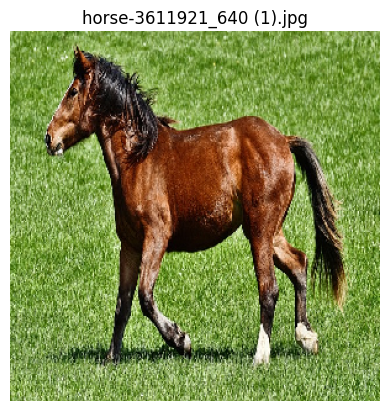

1/1 [==============================] - 0s 134ms/step
[[0.]]
[0.]
horse-3611921_640 (1).jpg is a horse


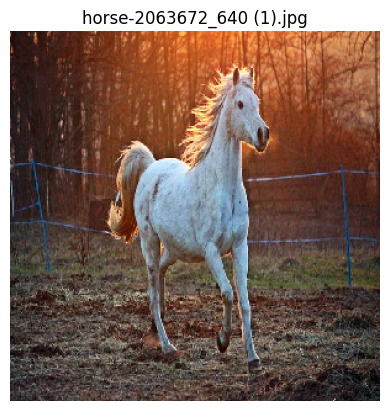

1/1 [==============================] - 0s 45ms/step
[[1.]]
[1.]
horse-2063672_640 (1).jpg is a human


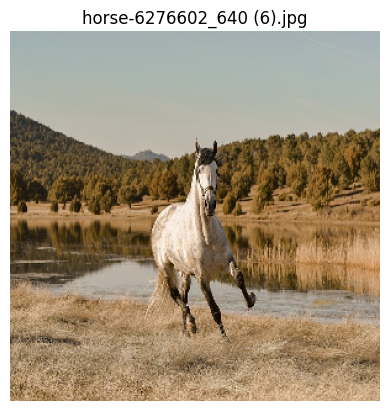

1/1 [==============================] - 0s 57ms/step
[[1.]]
[1.]
horse-6276602_640 (6).jpg is a human


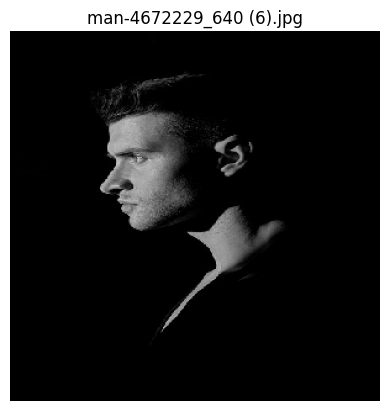

1/1 [==============================] - 0s 43ms/step
[[1.]]
[1.]
man-4672229_640 (6).jpg is a human


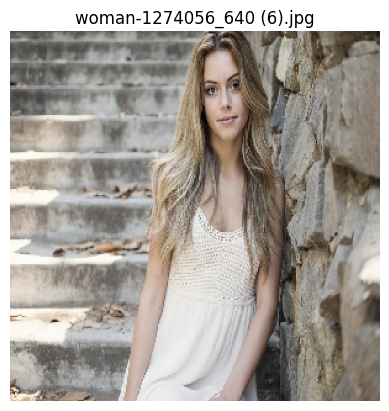

1/1 [==============================] - 0s 48ms/step
[[1.]]
[1.]
woman-1274056_640 (6).jpg is a human


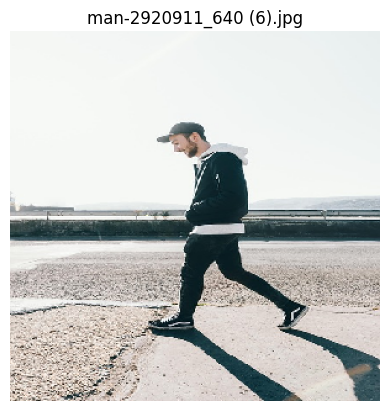

1/1 [==============================] - 0s 48ms/step
[[1.]]
[1.]
man-2920911_640 (6).jpg is a human


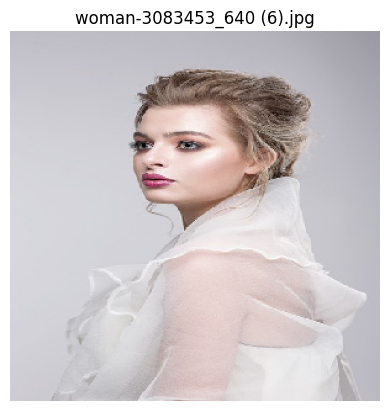

1/1 [==============================] - 0s 47ms/step
[[1.]]
[1.]
woman-3083453_640 (6).jpg is a human


In [25]:
#pixabay.com
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for f in uploaded.keys():
  #predicting images
  path = '/content/' + f
  img = image.load_img(path, target_size = (300, 300))#resize the files to 300x300

  #code to plot each test image
  plt.imshow(img)
  plt.title(f)
  plt.axis('off')
  plt.show()

  #image to array
  x = image.img_to_array(img) #2D
  x = np.expand_dims(x, axis = 0) #adding an extra dimension as needed for input

  image_tensor = np.vstack([x]) #vertical stacking
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])

  if classes[0] > 0.5:
    print(f + ' is a human')
  else:
    print(f + ' is a horse')

##**Transfer learning**

Using Google's Inception model version 3. This model has trained on more than a million images from a database called ImageNet and it can classify images into one thousand categories.

In [53]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_file = 'inception_v3.h5'
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None
                                )
pre_trained_model.load_weights(weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_205 (Conv2D)         (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 74, 74, 32)           96        ['conv2d_205[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 74, 74, 32)           0         ['batch_normalizati

Freeze the entire network from retraining and then set a variable to point at mixed7's output:

In [64]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [65]:
from tensorflow.keras import layers
from tensorflow.keras import Model
#Flatten the output layer to 1D
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.3)(x) #to reduce possible overspecialization of some neurons
x = layers.Dense(1, activation = 'sigmoid')(x)

In [66]:
model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(learning_rate = 0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    epochs= 20,
    verbose = 1)

##Multiclass classification: The Rock-Paper-Scissors game


In [72]:
!wget --no-check-certificate \
https://storage.googleapis.com/learning-datasets/rps.zip \
-O /tmp/rps.zip

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
TRAINING_DIR = '/tmp/rps/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)

--2024-03-20 03:01:47--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  32.1MB/s    in 6.3s    

2024-03-20 03:01:54 (30.4 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

Found 2520 images belonging to 3 classes.


In [73]:
model = tf.keras.models.Sequential([
# The input shape is the desired size of the image:
# 150x150 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu',
input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])

In [74]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop',
metrics=['accuracy'])

In [77]:
history = model.fit_generator(
    train_generator,
    epochs=25,
    #validation_data = validation_generator,
    verbose = 1)

<ipython-input-77-49bffa86c3e7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
79/79 [==============================] - 220s 3s/step - loss: 0.6512 - accuracy: 0.7036
Epoch 2/25
79/79 [==============================] - 266s 3s/step - loss: 0.3854 - accuracy: 0.8500
Epoch 3/25
79/79 [==============================] - 213s 3s/step - loss: 0.2480 - accuracy: 0.9020
Epoch 4/25
79/79 [==============================] - 210s 3s/step - loss: 0.1920 - accuracy: 0.9258
Epoch 5/25
79/79 [==============================] - 211s 3s/step - loss: 0.1416 - accuracy: 0.9444
Epoch 6/25
79/79 [==============================] - 211s 3s/step - loss: 0.1330 - accuracy: 0.9571
Epoch 7/25
79/79 [==============================] - 212s 3s/step - loss: 0.1001 - accuracy: 0.9639
Epoch 8/25
79/79 [==============================] - 213s 3s/step - loss: 0.1029 - accuracy: 0.9655
Epoch 9/25
79/79 [==============================] - 211s 3s/step - loss: 0.0778 - accuracy: 0.9750
Epoch 10/25
79/79 [==============================] - 204s 3s/step - loss: 0.0751 - accuracy: 0.9790
Epoch 11/

In [78]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for f in uploaded.keys():
  path = f
  img = image.load_img(path, target_size = (150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(f)
  print(classes)

Saving hand-2704013_640.jpg to hand-2704013_640.jpg
1/1 [==============================] - 0s 125ms/step
hand-2704013_640.jpg
[[0. 1. 0.]]
